# Info
Purpose:

    To build up the ORACLES all years summary of the AOD, and ACAOD, uncertainty. Pulling out all the different uncertainty calculations

Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - starsun.mat files for ORACLES

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-10-24
    Modified:


# Prepare python environment

In [1]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib notebook
import os
import glob

In [2]:
name = 'ORACLES'
vv = 'v1'
fp = getpath(name)
fp_sun = getpath('sunsat')

Return path named:  ORACLES /data/sam/ORACLES/
Return path named:  sunsat /data/sunsat/


# Load files

## Load the ict files

### 2016

In [3]:
vv6 = 'R4'
ar6 = hs.loadmat(fp+'/aod_ict/R4/all_aod_ict_{}_2016.mat'.format(vv6))

In [4]:
ar6['flac'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)
ar6['flacr'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&(ar6['fl_routine'])
ar6['flaco'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&~(ar6['fl_routine'])
ar6['flr'] = (ar6['qual_flag']==0) & (ar6['fl_routine'])
ar6['flo'] = (ar6['qual_flag']==0) & ~(ar6['fl_routine'])
ar6['fl'] = (ar6['qual_flag']==0)

In [5]:
days6 = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']
ar6['daysd'] = [days6[i] for i in ar6['days'].astype(int)]
ar6['ndtime'] = [datetime(int(d[0:4]),int(d[4:6]),int(d[6:8]),int(ar6['Start_UTC'][i]),
                          int((ar6['Start_UTC'][i]-float(int(ar6['Start_UTC'][i])))*60)) for i,d in enumerate(ar6['daysd'])]
ar6['ndtimes'] = np.array(ar6['ndtime'])

In [6]:
ar6['ndtimes'].shape

(483692,)

### 2017

In [8]:
vv7 = 'R1'
ar7 = hs.loadmat(fp+'/aod_ict_2017/R1/all_aod_ict_{}_2017.mat'.format(vv7))

In [9]:
ar7['flac'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)
ar7['flacr'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&(ar7['fl_routine'])
ar7['flaco'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&~(ar7['fl_routine'])
ar7['flr'] = (ar7['qual_flag']==0) & (ar7['fl_routine'])
ar7['flo'] = (ar7['qual_flag']==0) & ~(ar7['fl_routine'])
ar7['fl'] = (ar7['qual_flag']==0)

### 2018

In [10]:
vv8 = 'R1'
ar8 = hs.loadmat(fp+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv=vv8))

In [11]:
ar8['flac'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)  
ar8['flacr'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&(ar8['fl_routine']) 
ar8['flaco'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&~(ar8['fl_routine']) 
ar8['flr'] = (ar8['qual_flag']==0) & (ar8['fl_routine'])
ar8['flo'] = (ar8['qual_flag']==0) & (ar8['fl_routine']==False)
ar8['fl'] = (ar8['qual_flag']==0)

## Load the starsuns aod uncertainty

### 2016

In [7]:
days6 = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']

In [8]:
files6 = glob.glob(fp_sun+'ORACLES_2016/data_processed/starsuns/{}/**/*starsun.mat'.format('R3'),recursive=True)

In [9]:
f6s = [f for f in files6 if any(xs in f for xs in days6)]
f6s.sort()

In [10]:
f6s

['/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160824starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160825starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160827starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160830starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160831starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160902starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160904starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160906starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160908starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160910starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160912starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160914starsun.mat',
 '/d

In [11]:
f6s[11] = '/data/sunsat/ORACLES_2016/data_processed/starsuns/v3/4STAR_20160914starsun.mat'

In [12]:
var_names = ['t','tau_aero_noscreening','w','m_aero','tau_aero_err','m_err',
             'tau_aero_err1','tau_aero_err2','tau_aero_err3','tau_aero_err4','tau_aero_err5',
             'tau_aero_err6','tau_aero_err7','tau_aero_err8','tau_aero_err9','tau_aero_err10','tau_aero_err11',
            'c0','c0err']

In [13]:
sp6 = {}
for f in f6s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp6[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20160824
20160825
20160827
20160830
20160831
20160902
20160904
20160906
20160908
20160910
20160912
20160914
20160918
20160920
20160924
20160925
20160927
20160930


In [14]:
ar6.keys()

dict_keys(['AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'AOD_angstrom_470_865', 'AOD_polycoef_a0', 'AOD_polycoef_a1', 'AOD_polycoef_a2', 'GPS_Alt', 'Latitude', 'Longitude', 'Start_UTC', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650', 'amass_aer', 'days', 'fl', 'fl1', 'fl2', 'fl3', 'fl_QA', 'fl_alt', 'fl_alt_18', 'fl_alt_22', 'fl_alt_6', 'fl_routine', 'flac', 'flacr', 'flag_acaod', 'flr', 'qual_flag', 'flaco', 'flo', 'daysd', 'ndtime', 'ndtimes'])

In [15]:
var_names_1d = ['t','m_aero','m_err','tau_aero_err8','tau_aero_err10']
var_names_wvl = ['tau_aero_err','tau_aero_err1','tau_aero_err2','tau_aero_err3','tau_aero_err4','tau_aero_err5',
                 'tau_aero_err6','tau_aero_err7','tau_aero_err9','tau_aero_err11',
                 'c0','c0err']

In [16]:
wvl = sp6['20160824']['w'][0,:]

In [17]:
iwvls = [np.argmin(abs(wvl-0.355)),
         np.argmin(abs(wvl-0.380)),
         np.argmin(abs(wvl-0.452)),
         np.argmin(abs(wvl-0.470)),
         np.argmin(abs(wvl-0.501)),
         np.argmin(abs(wvl-0.520)),
         np.argmin(abs(wvl-0.530)),
         np.argmin(abs(wvl-0.532)),
         np.argmin(abs(wvl-0.550)),
         np.argmin(abs(wvl-0.606)),
         np.argmin(abs(wvl-0.620)),
         np.argmin(abs(wvl-0.660)),
         np.argmin(abs(wvl-0.675)),
         np.argmin(abs(wvl-0.700)),
         np.argmin(abs(wvl-0.781)),
         np.argmin(abs(wvl-0.865)),
         np.argmin(abs(wvl-1.02)),
         np.argmin(abs(wvl-1.04)),
         np.argmin(abs(wvl-1.064)),
         np.argmin(abs(wvl-1.236)),
         np.argmin(abs(wvl-1.250)),
         np.argmin(abs(wvl-1.559)),
         np.argmin(abs(wvl-1.627)),
         np.argmin(abs(wvl-1.650))]

In [18]:
wvls = [355,380,452,470,501,520,530,532,550,606,620,660,675,700,781,865,1020,1040,1064,1236,1250,1559,1627,1650]

In [19]:
# init
s6 = {}
s6['w'] = wvl
for g in var_names_1d: s6[g] = sp6['20160824'][g]
for g in var_names_wvl: s6[g] = sp6['20160824'][g][:,iwvls]

In [20]:
 for ss in days6[1:]:
        print(ss)
        for g in var_names_wvl:
            s6[g] = np.append(s6[g],sp6[ss][g][:,iwvls],axis=0)
        for g in var_names_1d: s6[g] = np.append(s6[g],sp6[ss][g])

20160825
20160827
20160830
20160831
20160902
20160904
20160906
20160908
20160910
20160912
20160914
20160918
20160920
20160924
20160925
20160927
20160930


In [21]:
s6.keys()

dict_keys(['w', 't', 'm_aero', 'm_err', 'tau_aero_err8', 'tau_aero_err10', 'tau_aero_err', 'tau_aero_err1', 'tau_aero_err2', 'tau_aero_err3', 'tau_aero_err4', 'tau_aero_err5', 'tau_aero_err6', 'tau_aero_err7', 'tau_aero_err9', 'tau_aero_err11', 'c0', 'c0err'])

In [22]:
s6['ndtime'] = lu.mat2py_time(s6['t'])

In [23]:
s6['ndtime'].shape, ar6['ndtimes'].shape

((371427,), (483692,))

### 2017

In [27]:
days7 = ['20170801','20170802','20170807','20170809', '20170812','20170813','20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']

In [28]:
files7 = glob.glob(fp_sun+'ORACLES_2017/data_processed/starsuns/{}/**/*starsun.mat'.format('R0'),recursive=True)

In [29]:
f7s = [f for f in files7 if any(xs in f for xs in days7)]
f7s.sort()

In [30]:
sp7 = {}
for f in f7s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp7[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


### 2018

In [19]:
days8 = ['20180921','20180922','20180924','20180927','20180930','20181002','20181003','20181005','20181007','20181010','20181012',
        '20181015','20181017','20181019','20181021','20181023','20181025','20181026','20181027']

In [20]:
files8 = glob.glob(fp_sun+'ORACLES_2018/data_processed/starsuns/{}/**/*starsun.mat'.format('R0'),recursive=True)

In [21]:
f8s = [f for f in files8 if any(xs in f for xs in days8)]
f8s.sort()

In [ ]:
sp8 = {}
for f in f8s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp8[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20180921
20180922
20180924


# Plot out data

## Separate the different tau errors

 - tau_aero_err1: airmass error (m_err) - abs(tau.*repmat(s.m_err,1,qq))
 - tau_aero_err2: c0err - 1./s.m_aero*(s.c0err./s.c0);
 - tau_aero_err3: dark standard deviation - s.darkstd./(s.raw-s.dark)./repmat(s.m_aero,1,qq);
 - tau_aero_err4: Rayleigh uncertainty - repmat(s.m_ray./s.m_aero,1,qq)*s.tau_r_err.*s.tau_ray;
 - tau_aero_err5: Ozone tau uncertainty - epmat(s.m_O3./s.m_aero,1,qq)*s.tau_O3_err.*s.tau_O3;
 - tau_aero_err6: NO2 tau uncertainty - repmat(s.m_NO2./s.m_aero,1,qq)*s.tau_NO2_err.*s.tau_NO2;
 - tau_aero_err7: O2-O2 tau uncertainty - repmat(s.m_ray./s.m_aero,1,qq).*s.tau_O4_err.*s.tau_O4;
 - tau_aero_err8: 0 - Legacy, used for H20 tau - 0; % legacy from the AATS code; reserve this variable for future H2O error estimat
 - tau_aero_err9: tracking error, from FOV vs. quad - s.track_err./repmat(s.m_aero,1,qq);
 - tau_aero_err10: 0; % reserved for error associated with diffuse light correction; tau_aero_err10=tau_aero.*runc_F'; %error of diffuse light correction
 - tau_aero_err11: CO2, CH4, N2O tau error - repmat(s.m_ray./s.m_aero,1,qq).*s.tau_CO2_CH4_N2O_abserr;
  
Differences between tau_aero_err and the saved uncertainty in the ict file due to window deposition corrections  
s.tau_aero_err=(s.tau_aero_err1.^2+s.tau_aero_err2.^2+s.tau_aero_err3.^2+s.tau_aero_err4.^2+s.tau_aero_err5.^2+s.tau_aero_err6.^2+s.tau_aero_err7.^2+s.tau_aero_err8.^2+s.tau_aero_err9.^2+s.tau_aero_err10.^2+s.tau_aero_err11.^2).^0.5;

In [104]:
sp6.keys()

dict_keys(['20160824', '20160825', '20160827', '20160830', '20160831', '20160902', '20160904', '20160906', '20160908', '20160910', '20160912', '20160914', '20160918', '20160920', '20160924', '20160925', '20160927', '20160930'])

In [105]:
sp6['20160824']['tau_aero_err1'].shape

(17676, 1556)

In [106]:
i380 = 1
i501 = 4

<IPython.core.display.Javascript object>


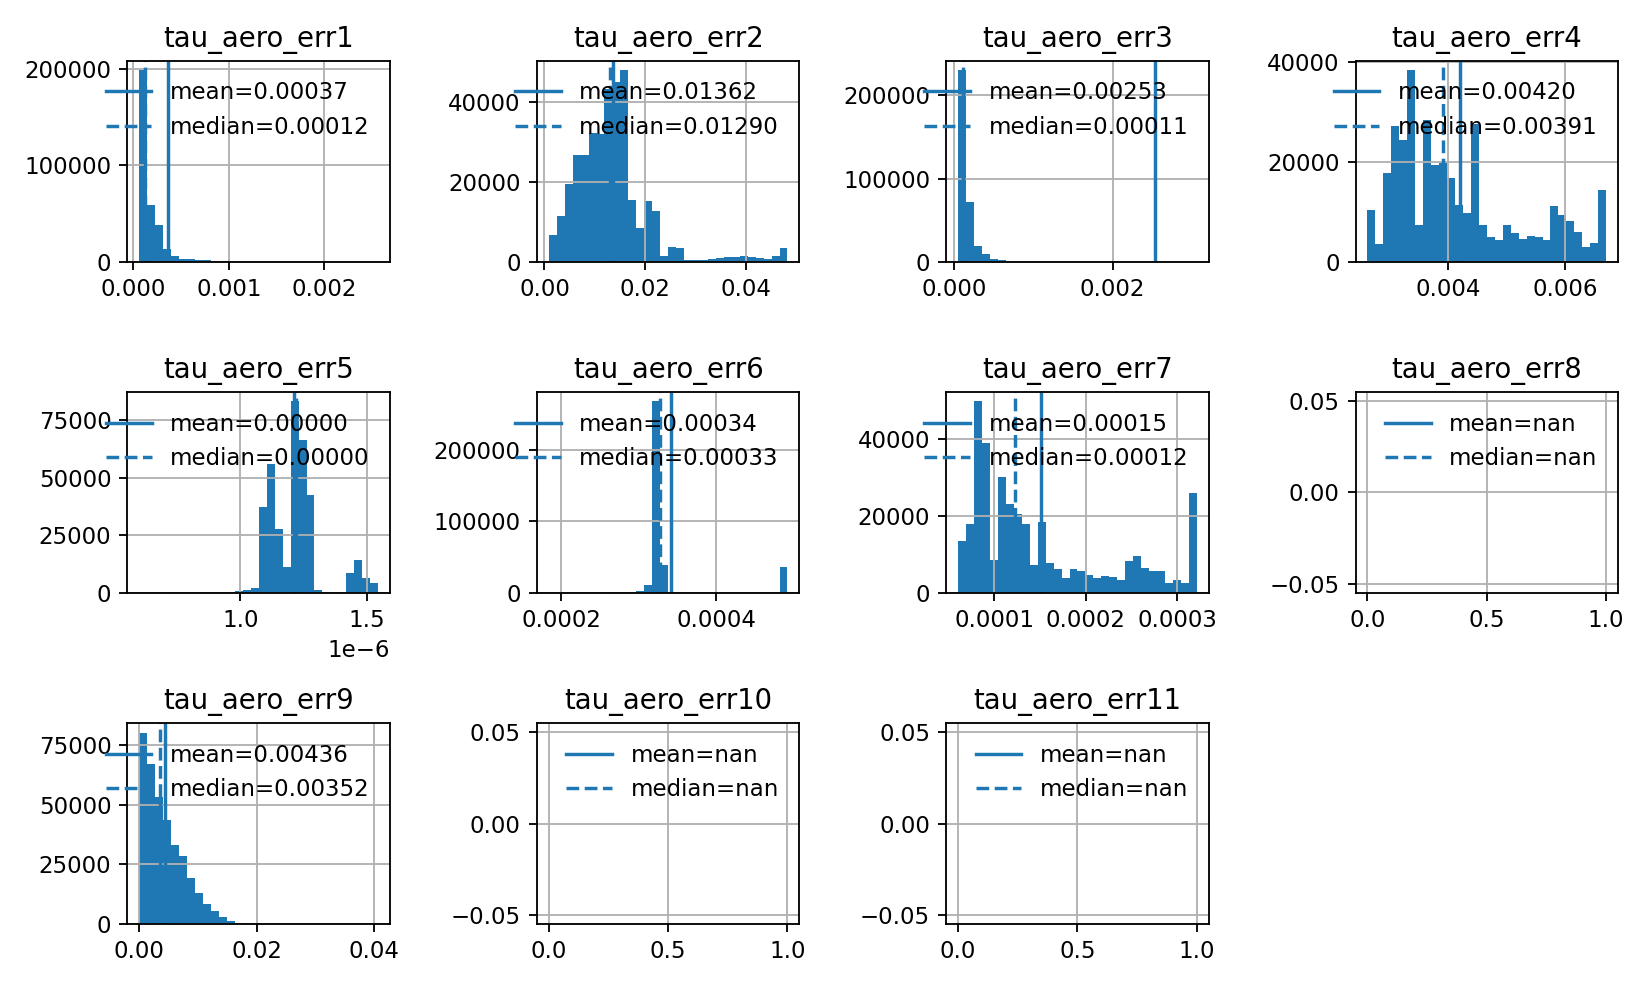

<ipython-input-118-292ba45e9f0c>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  sss = s6[lbl][ig,i380].astype(float)
<ipython-input-118-292ba45e9f0c>:17: RuntimeWarning: Mean of empty slice
  ax[i].axvline(np.nanmean(sss),linestyle='-',label='mean={:1.5f}'.format(np.nanmean(sss)))


In [118]:
fig,ax = plt.subplots(3,4,figsize=(10,6))
ax = ax.ravel()
for i in range(11):
    lbl = 'tau_aero_err{:1.0f}'.format(i+1)
    try:
        ig = np.isfinite(s6[lbl][:,i380]) 
        sss = s6[lbl][ig,i380].astype(float)
    except IndexError:
        sss = s6[lbl].astype(float)
    igg = (sss>np.percentile(sss,0.5)) & (sss<np.percentile(sss,99.5))
    sss = sss[igg]
    if i==2 or i==0:
        ax[i].hist(sss,bins=30,range=[np.percentile(sss,3),np.percentile(sss,97)])
    else:
        ax[i].hist(sss,bins=30)
    
    ax[i].axvline(np.nanmean(sss),linestyle='-',label='mean={:1.5f}'.format(np.nanmean(sss)))
    ax[i].axvline(np.nanmedian(sss),linestyle='--',label='median={:1.5f}'.format(np.nanmedian(sss)))
    ax[i].legend(frameon=False)
    ax[i].set_title(lbl)
    ax[i].grid()
ax[11].axis('off')
plt.tight_layout()

In [24]:
ax = ax.ravel()

In [25]:
np.max(sp6['20160824'][lbl][np.isfinite(sp6['20160824'][lbl][:,i500]),i500])

NameError: name 'i500' is not defined

In [26]:
sp6[ds][lbl].shape

NameError: name 'ds' is not defined

## Plot time series of errors

<IPython.core.display.Javascript object>


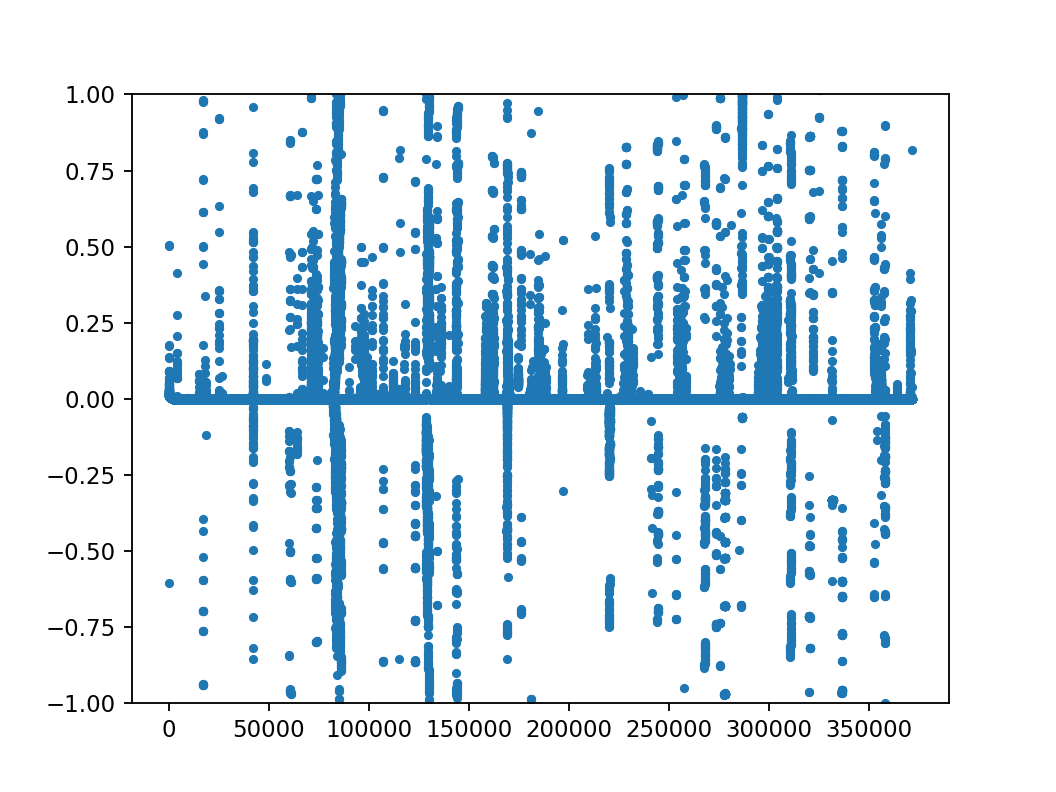

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-1.0, 1.0)

In [28]:
plt.figure()
i = 2
lbl = 'tau_aero_err{:1.0f}'.format(i+1)
plt.plot(s6[lbl][:,i380],'.')
plt.ylim(-1,1)

In [29]:
np.append(var_names,['dark','raw','darkstd'])

array(['t', 'tau_aero_noscreening', 'w', 'm_aero', 'tau_aero_err',
       'm_err', 'tau_aero_err1', 'tau_aero_err2', 'tau_aero_err3',
       'tau_aero_err4', 'tau_aero_err5', 'tau_aero_err6', 'tau_aero_err7',
       'tau_aero_err8', 'tau_aero_err9', 'tau_aero_err10',
       'tau_aero_err11', 'c0', 'c0err', 'dark', 'raw', 'darkstd'],
      dtype='<U20')

In [30]:
 ss = hs.loadmat(f,variable_names=np.append(var_names,['dark','raw','darkstd']))

In [31]:
ss.keys()

dict_keys(['__header__', '__version__', '__globals__', 't', 'raw', 'w', 'c0', 'c0err', 'dark', 'darkstd', 'm_aero', 'tau_aero_noscreening', 'm_err', 'tau_aero_err1', 'tau_aero_err2', 'tau_aero_err3', 'tau_aero_err4', 'tau_aero_err5', 'tau_aero_err6', 'tau_aero_err7', 'tau_aero_err8', 'tau_aero_err9', 'tau_aero_err10', 'tau_aero_err11', 'tau_aero_err'])

In [32]:
s.darkstd./(s.raw-s.dark)./repmat(s.m_aero,1,qq);

SyntaxError: invalid syntax (<ipython-input-32-27b76123f277>, line 1)

In [33]:
ss['darkstd'].shape

(15576, 1556)

In [34]:
ss['dark'].shape

(15576, 1556)

In [35]:
ss['raw'].shape

(15576, 1556)

<IPython.core.display.Javascript object>


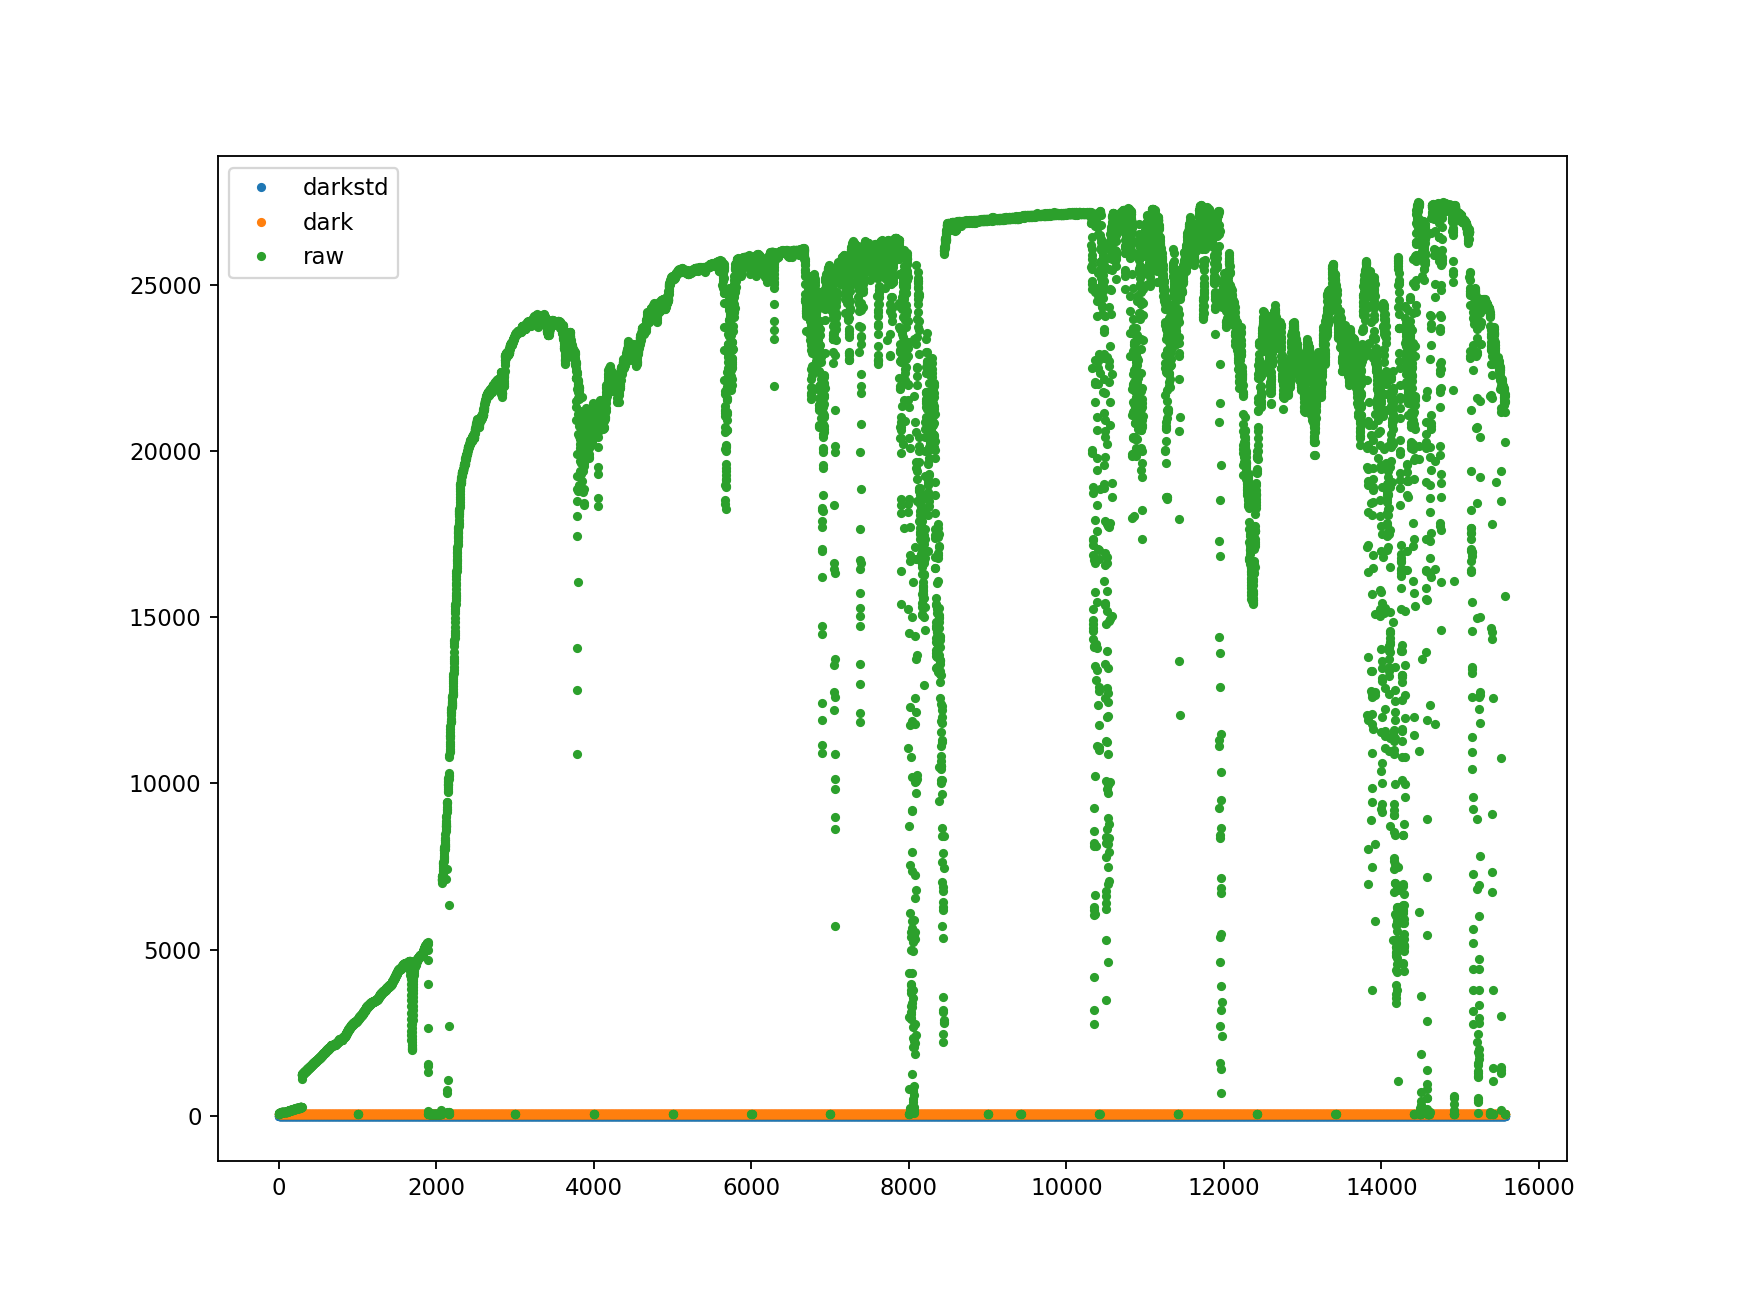

In [36]:
plt.figure()
plt.plot(ss['darkstd'][:,400],'.',label='darkstd')

plt.plot(ss['dark'][:,400],'.',label='dark')

plt.plot(ss['raw'][:,400],'.',label='raw')
plt.legend()

In [37]:
iwvls

[226,
 257,
 346,
 369,
 407,
 431,
 444,
 446,
 469,
 539,
 556,
 607,
 626,
 657,
 760,
 868,
 1083,
 1094,
 1108,
 1212,
 1221,
 1438,
 1491,
 1510]

In [38]:
ii = 257

<IPython.core.display.Javascript object>


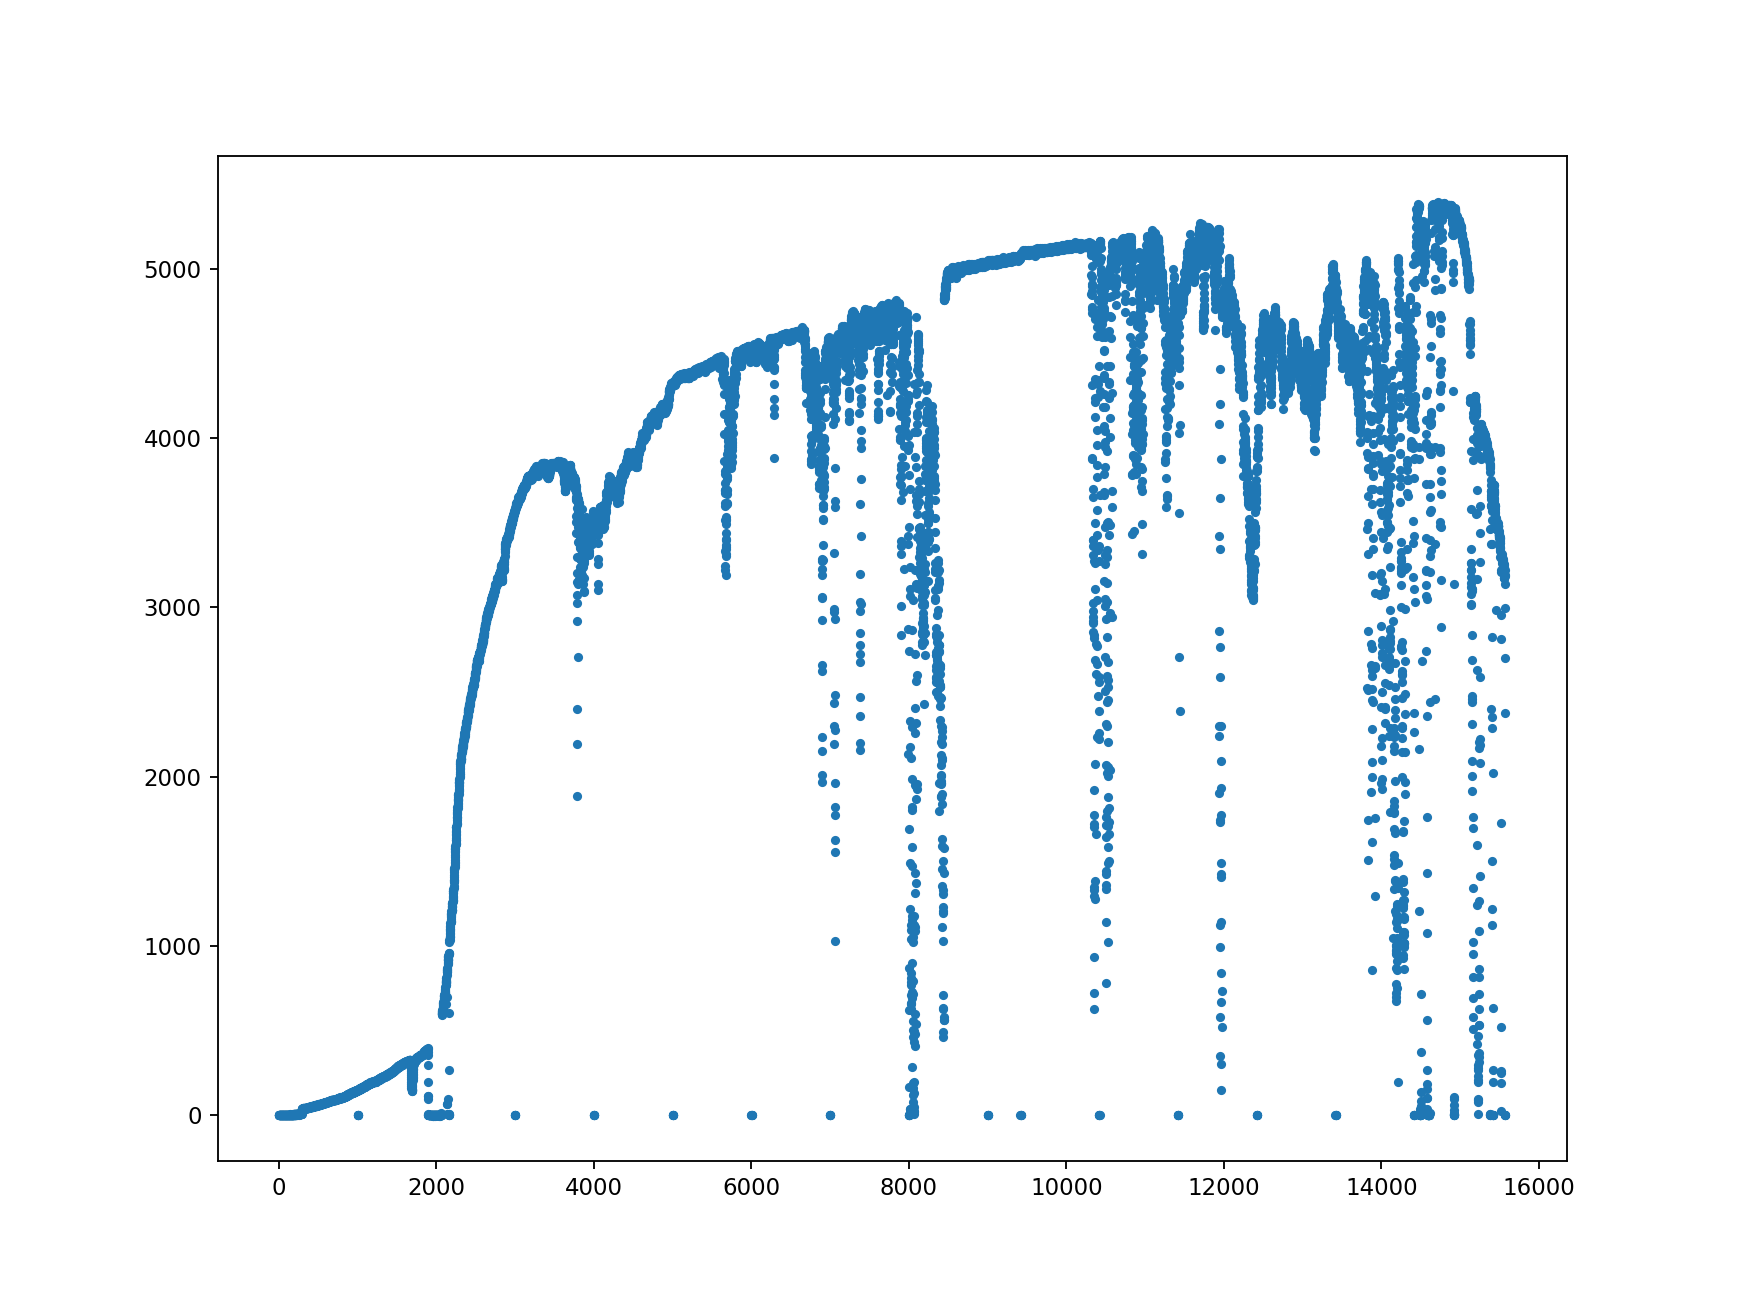

In [39]:
plt.figure()
plt.plot(ss['raw'][:,ii]-ss['dark'][:,ii],'.')

In [40]:
ss['m_aero'].shape

(15576, 1)

<IPython.core.display.Javascript object>


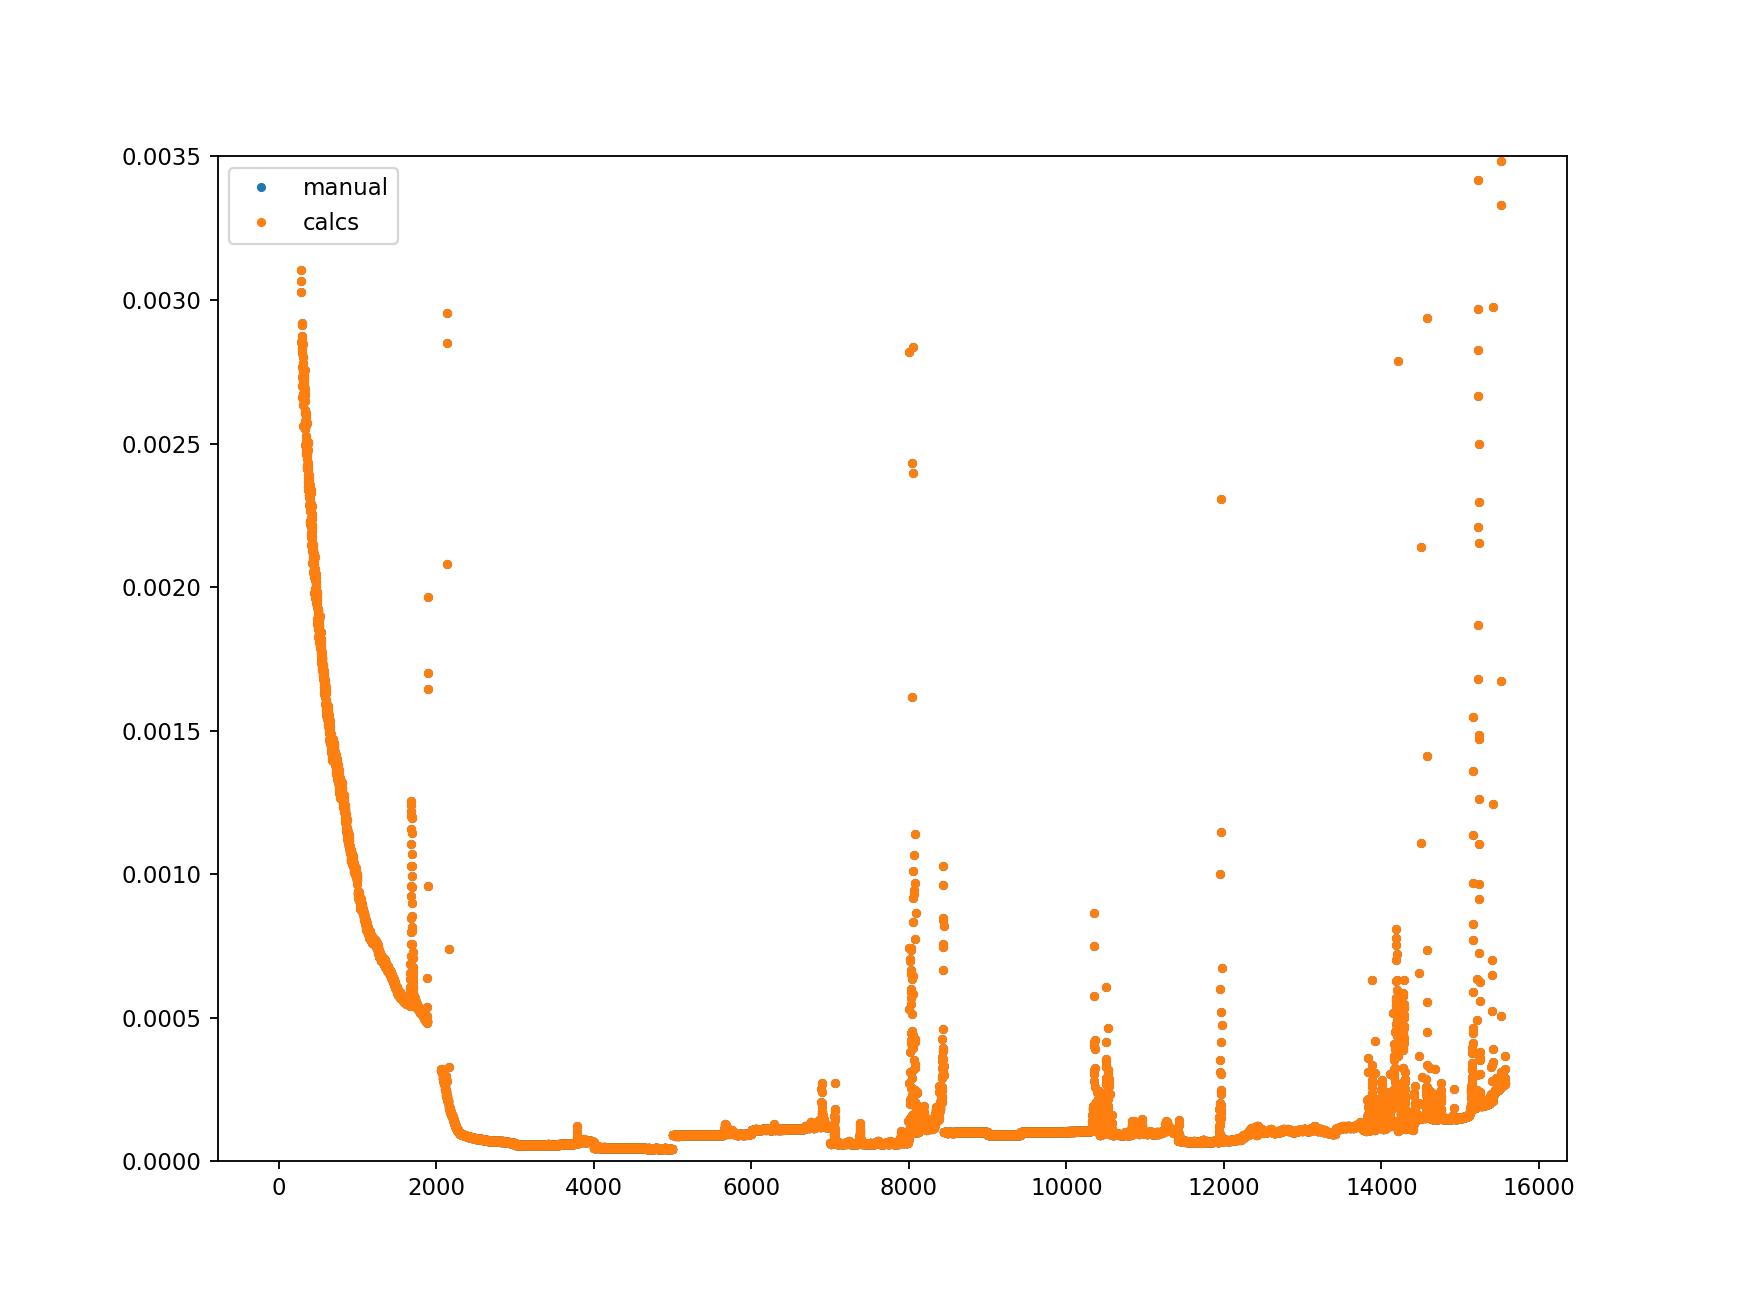

<ipython-input-43-052ded715697>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ss['darkstd'][:,ii]/(ss['raw'][:,ii]-ss['dark'][:,ii])/ss['m_aero'][:,0],'.',label='manual')


In [43]:
plt.figure()
plt.plot(ss['darkstd'][:,ii]/(ss['raw'][:,ii]-ss['dark'][:,ii])/ss['m_aero'][:,0],'.',label='manual')
plt.plot(ss['tau_aero_err3'][:,ii],'.',label='calcs')
plt.ylim(0,0.0035)
plt.legend()

<IPython.core.display.Javascript object>


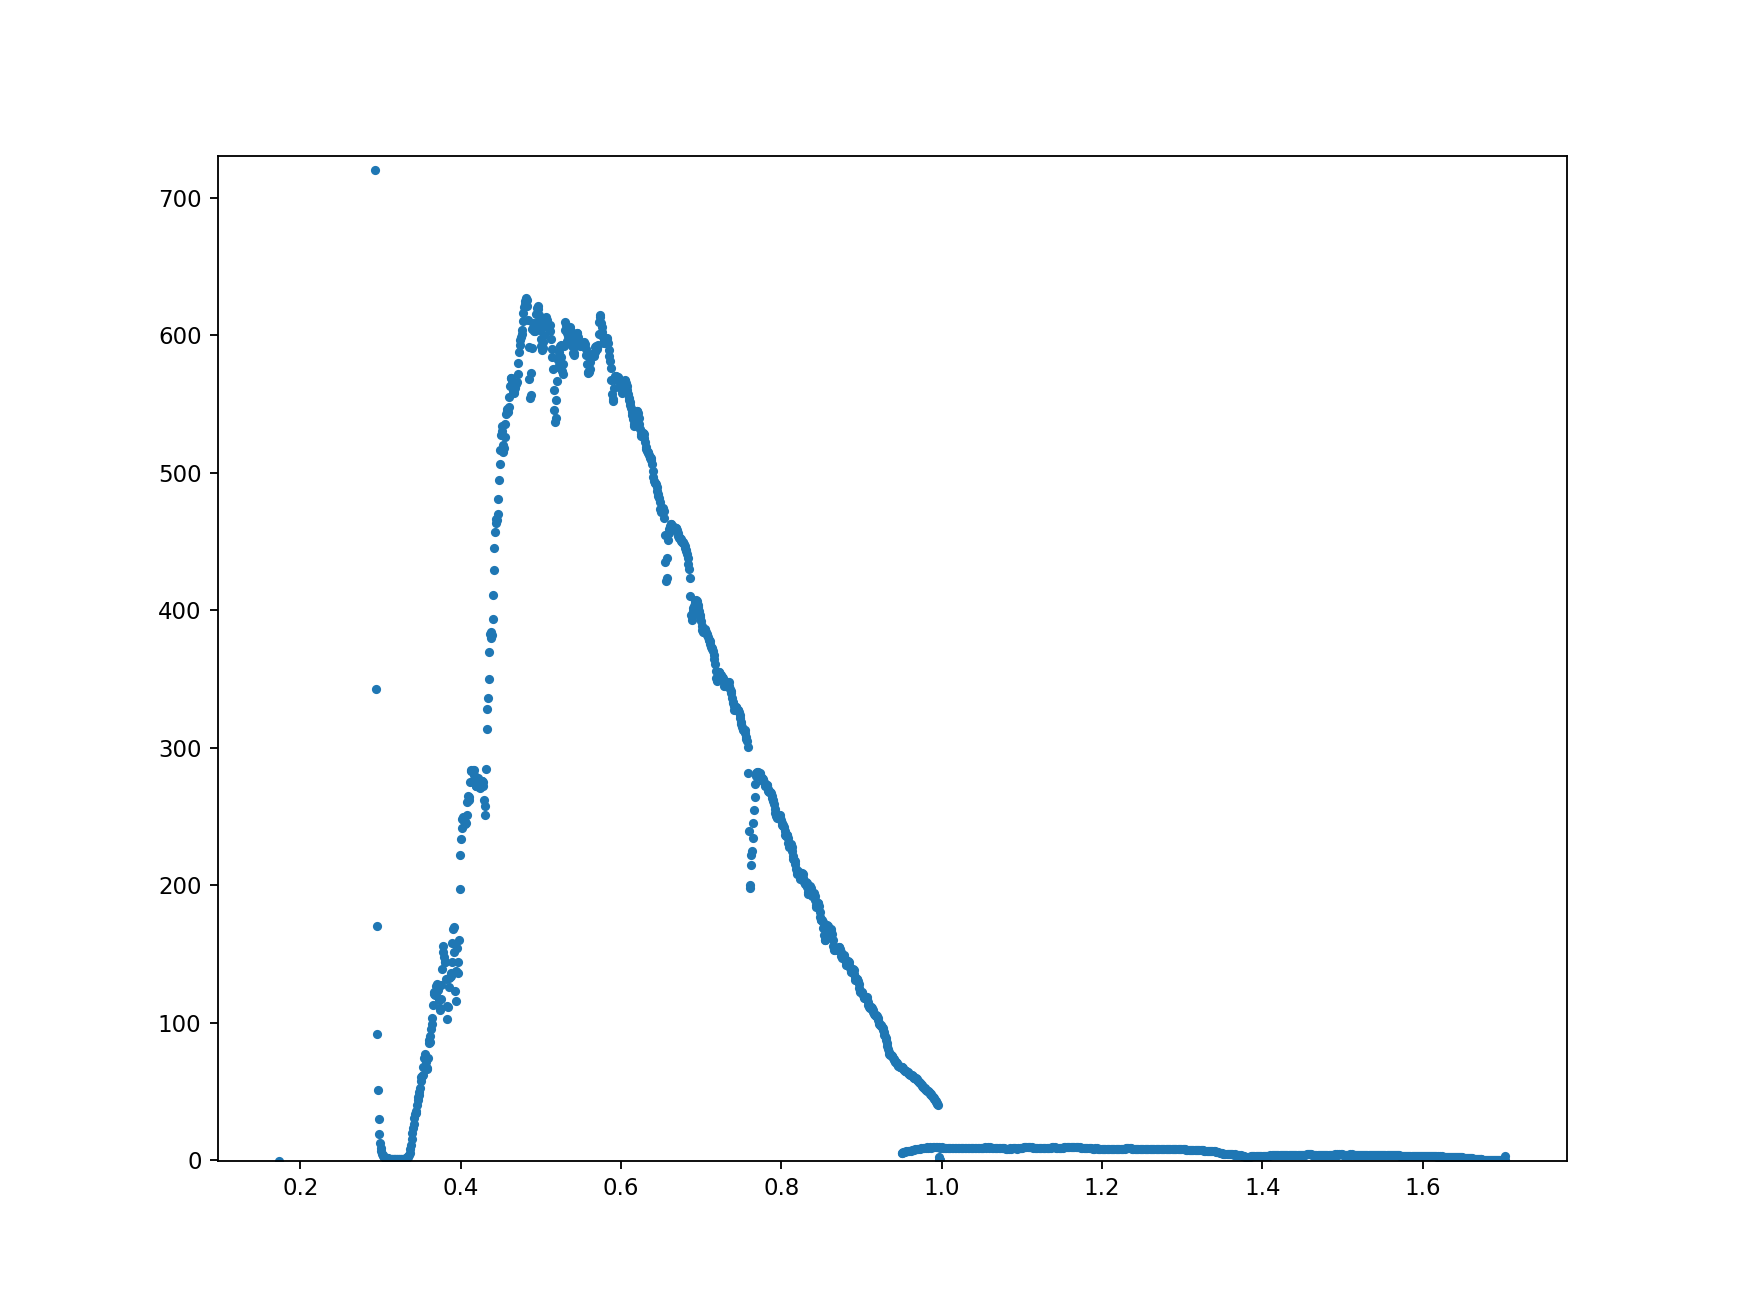

(-1.0, 730.0)

In [90]:
plt.figure()
plt.plot(wvl,ss['c0'][0,:],'.')
plt.ylim(-1,730)

<IPython.core.display.Javascript object>


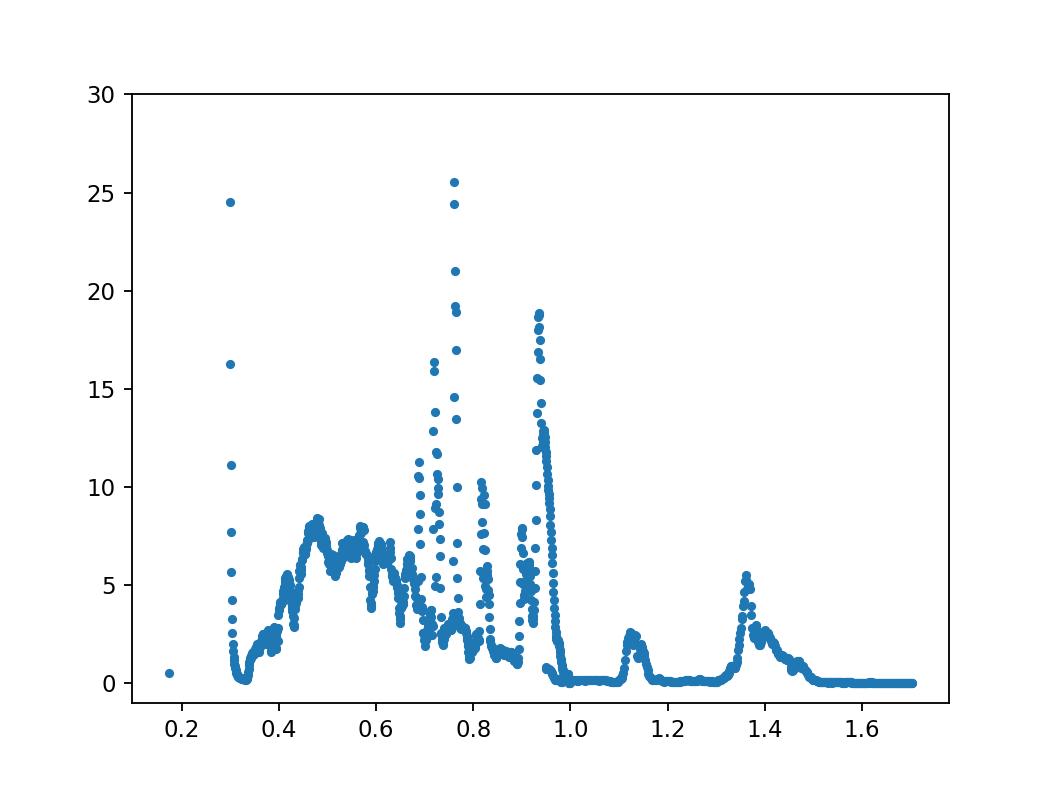

(-1.0, 30.0)

In [91]:
plt.figure()
plt.plot(wvl,ss['c0err'][0,:],'.')
plt.ylim(-1,30)

<IPython.core.display.Javascript object>


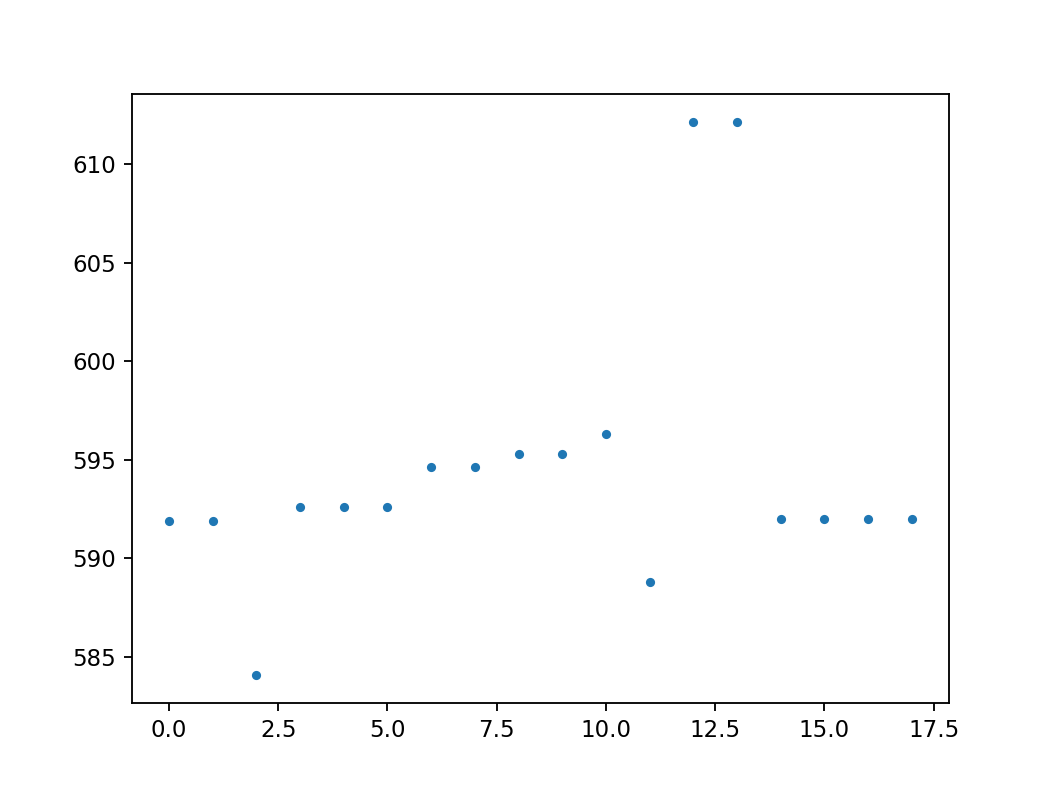

<IPython.core.display.Javascript object>


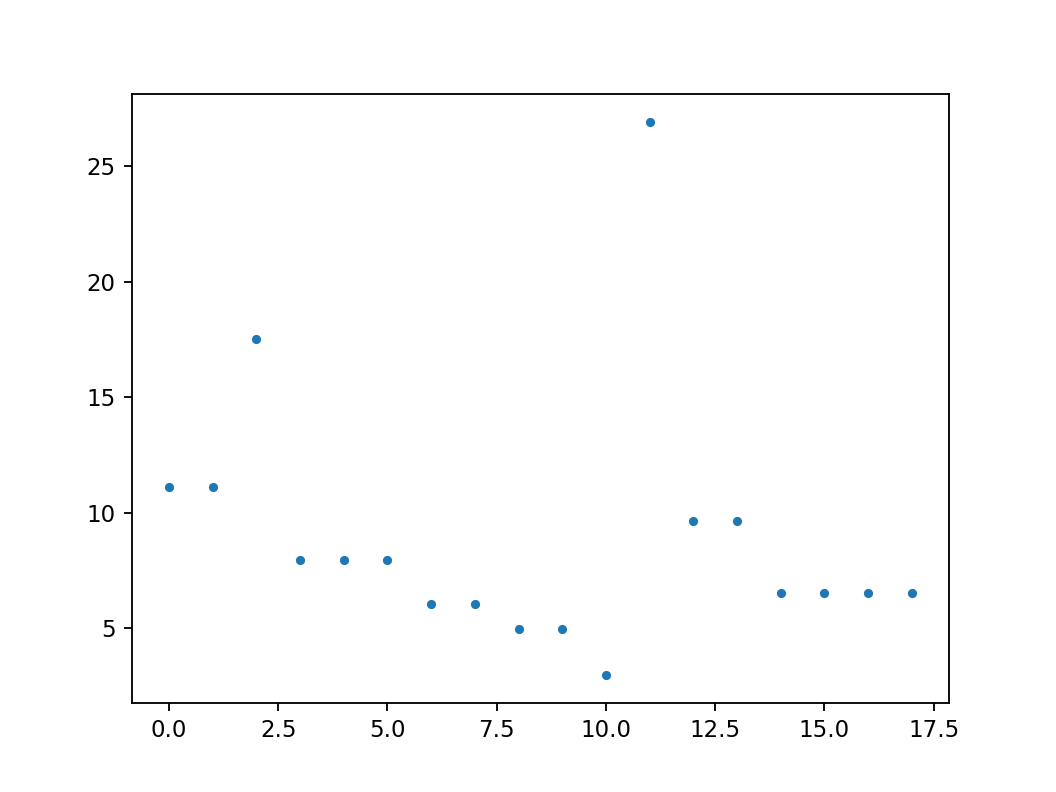

<IPython.core.display.Javascript object>


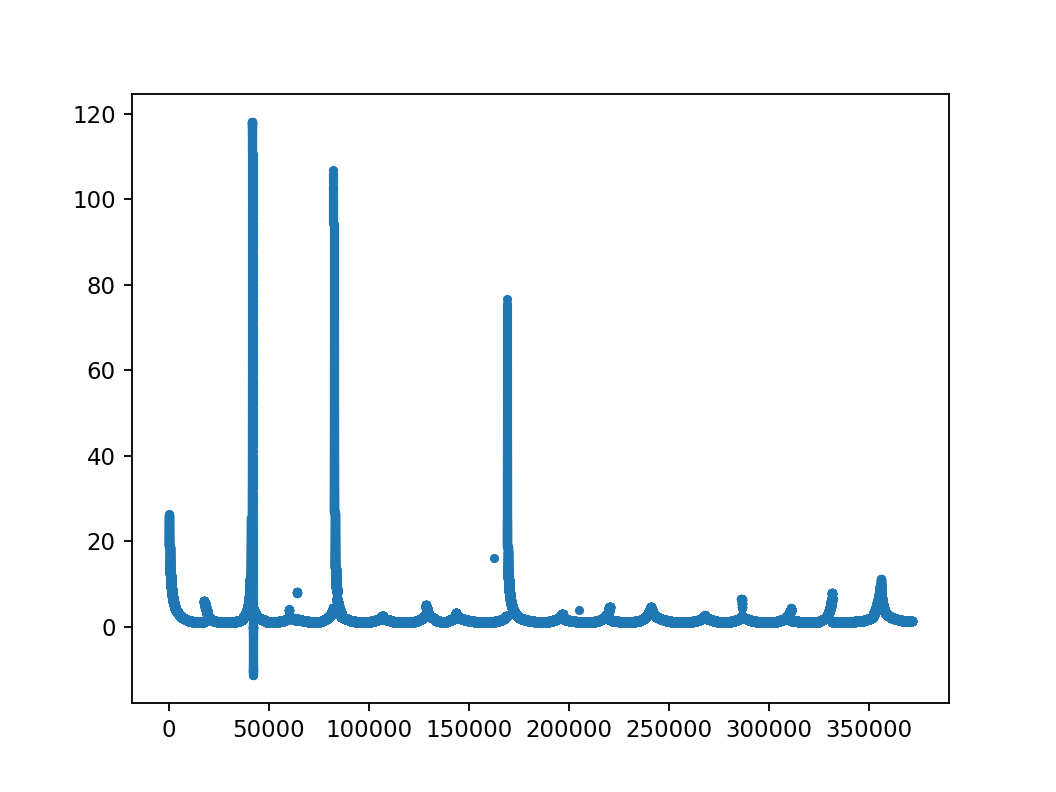

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [92]:
plt.figure()
plt.plot(s6['c0'][:,i501],'.')
plt.figure()
plt.plot(s6['c0err'][:,i501],'.')
plt.figure()
plt.plot(s6['m_aero'][:],'.')


<IPython.core.display.Javascript object>


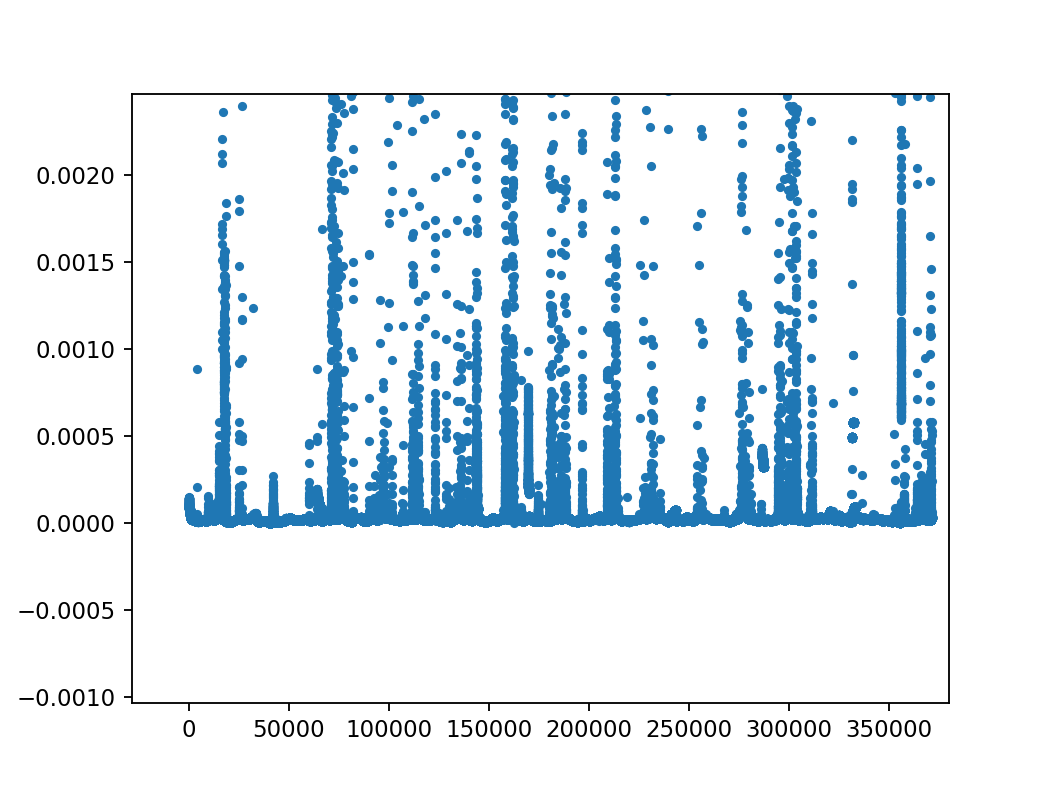

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 0.0035)

In [46]:
plt.figure()
plt.plot(s6['tau_aero_err3'][:,4],'.')
plt.ylim(0,0.0035)

<IPython.core.display.Javascript object>


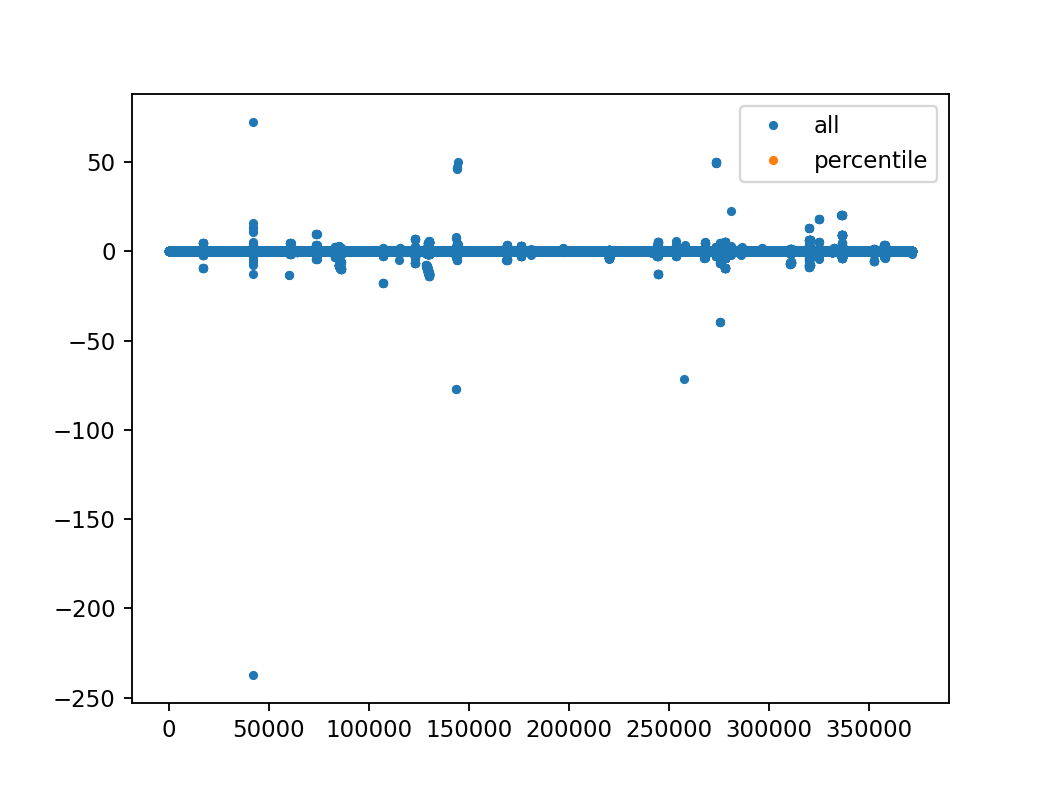

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-49-1fe47e39c07e>:4: RuntimeWarning: invalid value encountered in greater
  ip = (s0>np.percentile(s0,0.01)) & (s0<np.percentile(s0,0.99))
<ipython-input-49-1fe47e39c07e>:4: RuntimeWarning: invalid value encountered in less
  ip = (s0>np.percentile(s0,0.01)) & (s0<np.percentile(s0,0.99))
/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [49]:
plt.figure()
s0 = s6['tau_aero_err3'][:,4]
plt.plot(s0,'.',label='all')
ip = (s0>np.percentile(s0,0.01)) & (s0<np.percentile(s0,0.99))
plt.plot(s0[ip],'.',label='percentile')
plt.legend()

## Match the flags from ict files to the errors

In [51]:
ar6.keys()

dict_keys(['AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'AOD_angstrom_470_865', 'AOD_polycoef_a0', 'AOD_polycoef_a1', 'AOD_polycoef_a2', 'GPS_Alt', 'Latitude', 'Longitude', 'Start_UTC', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650', 'amass_aer', 'days', 'fl', 'fl1', 'fl2', 'fl3', 'fl_QA', 'fl_alt', 'fl_alt_18', 'fl_alt_22', 'fl_alt_6', 'fl_routine', 'flac', 'flacr', 'flag_acaod', 'flr', 'qual_flag', 'flaco', 'flo'])

In [54]:
ar6['days']

array([ 0.,  0.,  0., ..., 17., 17., 17.])

<IPython.core.display.Javascript object>


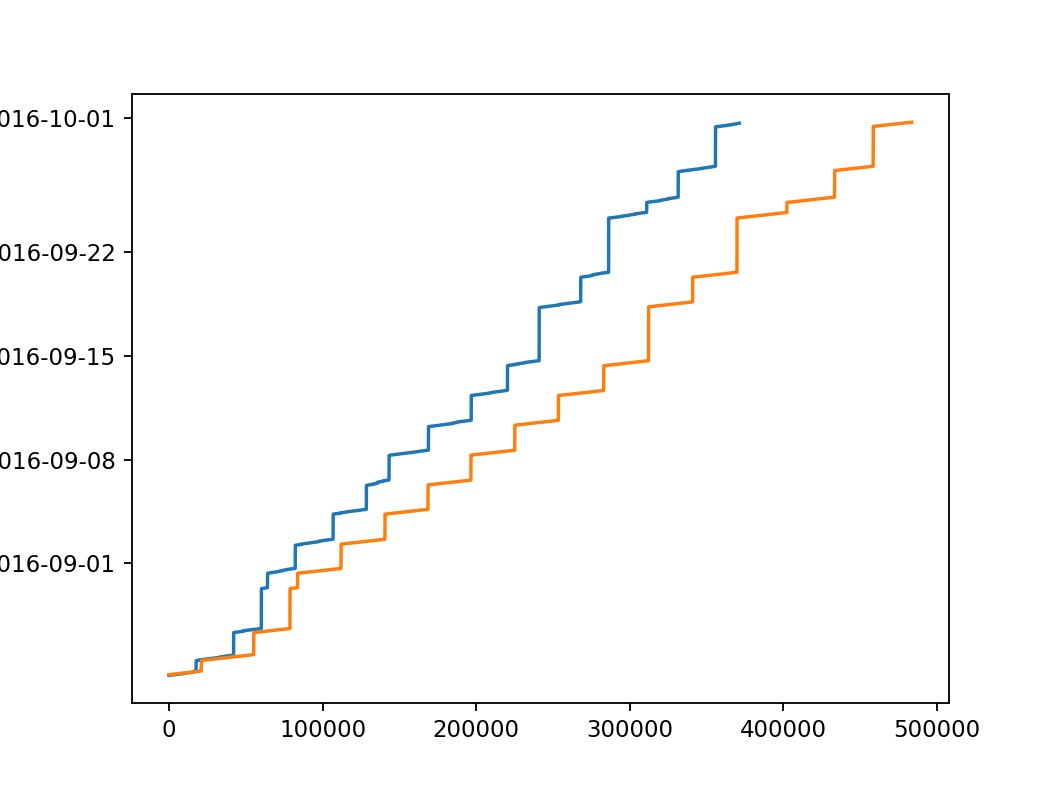

In [74]:
iar6 = Sp.find_closest(ar6['ndtimes'],s6['ndtime'])

In [75]:
print(iar6.shape,ar6['ndtimes'].shape,s6['ndtime'].shape)

(371427,) (483692,) (371427,)


<IPython.core.display.Javascript object>


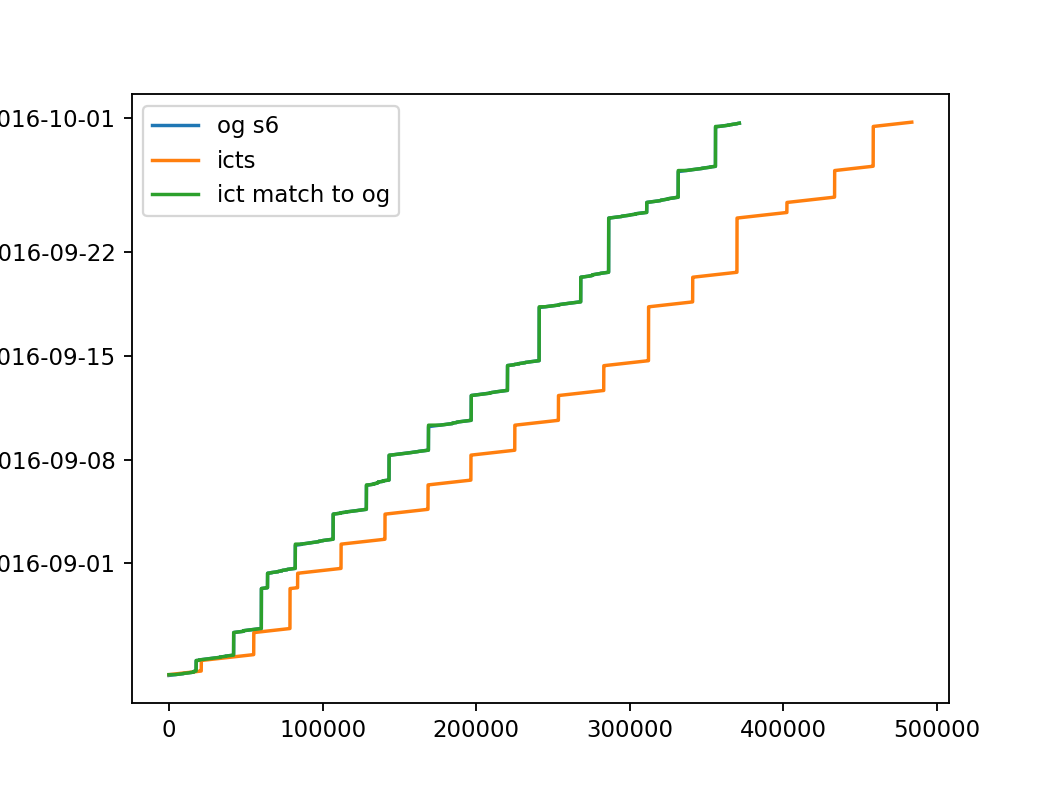

In [77]:
plt.figure()
plt.plot(s6['ndtime'],label='og s6')
plt.plot(ar6['ndtimes'],label='icts')
plt.plot(ar6['ndtimes'][iar6],label='ict match to og')
plt.legend()


In [78]:
s6['QA'] = ar6['fl_QA'][iar6]

In [81]:
s6['QA']

array([ True,  True,  True, ..., False, False, False])

<IPython.core.display.Javascript object>


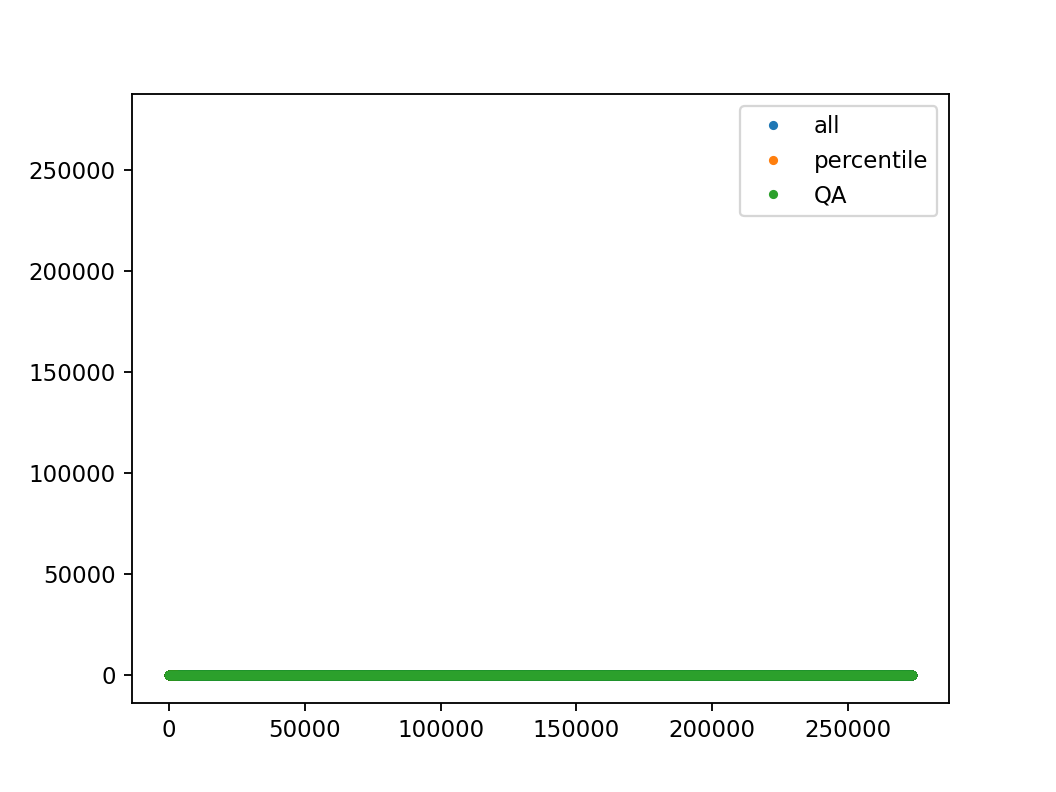

In [93]:
plt.figure()
s0 = s6['tau_aero_err3'][s6['QA'],4]
s0 = s0.real[np.isfinite(s0.real)]
plt.plot(s0,'.',label='all')
ip = (s0>=np.percentile(s0,0.01)) & (s0<=np.percentile(s0,0.999))
plt.plot(s0[ip],'.',label='percentile')
plt.plot(s0,'.',label='QA')
plt.legend()

In [86]:
np.percentile(s0,0.99),np.percentile(s0,0.01)

NameError: name 'real' is not defined

In [101]:
np.percentile(s0,99.9)

0.06300239914655707

<IPython.core.display.Javascript object>


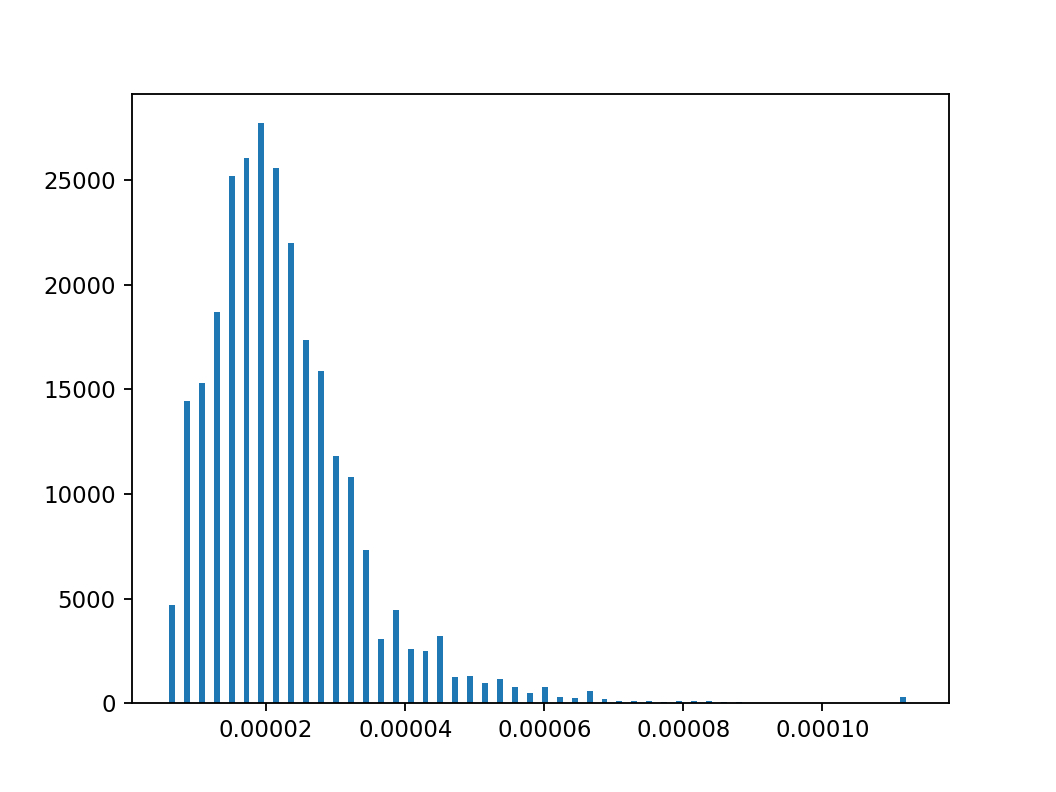

(array([[4.6980e+03, 1.4437e+04, 1.5323e+04, 1.8706e+04, 2.5186e+04,
         2.6075e+04, 2.7720e+04, 2.5573e+04, 2.2000e+04, 1.7363e+04,
         1.5877e+04, 1.1820e+04, 1.0804e+04, 7.3130e+03, 3.0850e+03,
         4.4600e+03, 2.5780e+03, 2.4810e+03, 3.2180e+03, 1.2640e+03,
         1.3050e+03, 9.6500e+02, 1.1450e+03, 7.4900e+02, 5.0500e+02,
         7.5000e+02, 3.0300e+02, 2.6300e+02, 5.9600e+02, 1.9700e+02,
         1.0300e+02, 8.5000e+01, 7.9000e+01, 6.9000e+01, 8.2000e+01,
         9.2000e+01, 1.0600e+02, 4.1000e+01, 4.9000e+01, 2.4000e+01,
         2.5000e+01, 2.4000e+01, 2.6000e+01, 1.9000e+01, 2.0000e+01,
         1.6000e+01, 1.9000e+01, 1.9000e+01, 2.2000e+01, 2.9800e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 

In [103]:
plt.figure()
plt.hist([s0,s0[ip]],bins=50,range=(np.percentile(s0,1),np.percentile(s0,99)))

